In [1]:
import json
import matplotlib.pyplot as plt
from dataloader import *

# Load David's first 30 sentences
with open('../preliminary/david-first-thirty-sent.json') as f:
    data = json.load(f)[:30]

In [2]:
# The systems we looked at
systems = set([x['system'] for x in data])

# Edit types
edit_types = set(data[0]['annotations'].keys())

In [3]:
data = consolidate_edits(data)          # Adds 'edits' field
data = consolidate_annotations(data)    # Adds 'processed_annotations' field

In [4]:
# Example: Searches for coreference errors
deletions = [process_annotation(k) for k in [i for j in [[x for x in sent['edits'] if x['type'] == 'deletion'] for sent in data] for i in j]]
for d in deletions:
    if d['error_type'] == Error.COREFERENCE:
        print(d)

{'edit_type': 'deletion', 'id': 1, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 0}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 3}
{'edit_type': 'deletion', 'id': 2, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 3}
{'edit_type': 'deletion', 'id': 4, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 2}
{'edit_type': 'deletion', 'id': 1, 'information_impact': <Information.LESS: 1>, 'type': <Quality.ERROR: 3>, 'grammar_error': False, 'error_type': <Error.COREFERENCE: 1>, 'rating': 2}
{'edit_type': 'deletion', 'id': 0, 'information_impact': <Information.LESS: 1>, 'type

In [5]:
# Example: Annotations for sentence 0
data[0]['processed_annotations']

[{'edit_type': 'deletion',
  'id': 0,
  'information_impact': <Information.LESS: 1>,
  'type': <Quality.QUALITY: 1>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3},
 {'edit_type': 'deletion',
  'id': 1,
  'information_impact': <Information.LESS: 1>,
  'type': <Quality.QUALITY: 1>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3},
 {'edit_type': 'substitution',
  'id': 0,
  'information_impact': <Information.DIFFERENT: 4>,
  'type': <Quality.ERROR: 3>,
  'grammar_error': False,
  'error_type': <Error.INFORMATION_REWRITE: 2>,
  'rating': 0}]

In [6]:
# Example: Edits for sentence 0
data[0]['edits']

[{'type': 'deletion',
  'id': 0,
  'original_span': (61, 69),
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'deletion',
  'id': 1,
  'original_span': (111, 133),
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'substitution',
  'id': 0,
  'original_span': (157, 161),
  'simplified_span': (124, 127),
  'annotation': ['different', 'minor', 'no']}]

In [7]:
# Example: Sum the annotated edits for each system
for system in systems:
    print(system)
    print(sum_edits_for_system(data, system))

new_systems/asset.test.simp.second
{'deletion': 4, 'substitution': 12, 'insertion': 0, 'split': 0, 'reorder': 1, 'structure': 1}
systems/transformer_w_split.txt
{'deletion': 5, 'substitution': 4, 'insertion': 3, 'split': 0, 'reorder': 1, 'structure': 0}
systems/Hybrid.lower
{'deletion': 11, 'substitution': 2, 'insertion': 1, 'split': 0, 'reorder': 4, 'structure': 2}
systems/lstm_w_split.txt
{'deletion': 5, 'substitution': 5, 'insertion': 1, 'split': 0, 'reorder': 0, 'structure': 0}
new_systems/turk_corpus_random.txt
{'deletion': 1, 'substitution': 3, 'insertion': 2, 'split': 0, 'reorder': 0, 'structure': 2}
new_systems/simple_wiki.txt
{'deletion': 1, 'substitution': 5, 'insertion': 2, 'split': 0, 'reorder': 2, 'structure': 1}
systems/T5.txt
{'deletion': 1, 'substitution': 5, 'insertion': 4, 'split': 0, 'reorder': 0, 'structure': 1}
systems/Dress-Ls.lower
{'deletion': 5, 'substitution': 5, 'insertion': 1, 'split': 0, 'reorder': 0, 'structure': 1}


In [8]:
# Example: sum the errors
def sum_errors_by_type(data):
    ann = [i for j in [sent['processed_annotations'] for sent in data] for i in j]
    errors = [a for a in ann if a['type'] == Quality.ERROR]

    out = {}
    for error in Error:
        errors_by_type = [e for e in errors if e['error_type'] == error]
        out[error] = len(errors_by_type)
        # display(errors_by_type)
    return out
sum_errors_by_type(data)

{<Error.COREFERENCE: 1>: 10,
 <Error.INFORMATION_REWRITE: 2>: 3,
 <Error.REPETITION: 3>: 3,
 <Error.CONTRADICTION: 4>: 0,
 <Error.HALLUCINATION: 5>: 0,
 <Error.IRRELEVANT: 6>: 0,
 <Error.UNNECESSARY_INSERTION: 7>: 2,
 <Error.COMPLEX_WORDING: 8>: 4}

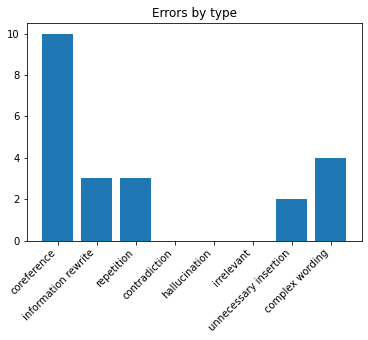

In [97]:
errors = sum_errors_by_type(data)
error_names = [str(x).split('.')[1].lower().replace('_',' ') for x in errors.keys()]

plt.bar(error_names, list(errors.values()), align='center')
plt.xticks(rotation=45, ha="right")
plt.title('Errors by type')
plt.show()

<Figure size 3000x1800 with 0 Axes>

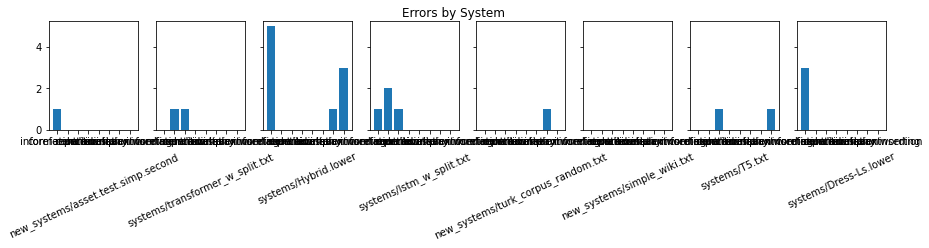

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6), dpi=300) # tight_layout=True
fig, sb = plt.subplots(1, len(systems), sharey='row', figsize=(15, 2))
fig.suptitle('Errors by System')

systems_list = list(systems)
error_names = [str(x).split('.')[1].lower().replace('_',' ') for x in errors.keys()]

i = 0
for subplot in sb:
    errors = sum_errors_by_type(get_sentences_for_system(data, systems_list[i]))
    subplot.bar(error_names, list(errors.values()), align='center')
    subplot.set_xlabel(systems_list[i], rotation=25, ha="center")
    i += 1


# Idea: One stacked graph with number of errors on x axis and system on y axis. Each bar has a stacked set 
# of colors representing each error

In [93]:
list(errors.values())

[3, 0, 0, 0, 0, 0, 0, 0]